<a href="https://colab.research.google.com/github/parthhh-a/Residex-Index-Price-Prediction-for-Banglore/blob/main/Resindex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resindex

https://residex.nhbonline.org.in/

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('/content/HPI@Assessment Prices_Index.xlsx')
df.head()

,City,Jun--2013,Sep--2013,Dec--2013,Mar--2014,Jun--2014,Sep--2014,Dec--2014,Mar--2015,Jun--2015,...,Sep- 2020,Dec- 2020,Mar- 2021,Jun- 2021,Sep- 2021,Dec- 2021,Mar- 2022,Jun- 2022,Sep- 2022,Dec- 2022
0,Bengaluru,76,77,78,79,80,81,83,85,86,...,116,116,118,119,119,120,121,123.2,126.12,129.56


In [5]:
len(df)

1

In [6]:
x_orig = df.columns
x_orig = np.array(x_orig[1:])
x_orig

array(['Jun--2013', 'Sep--2013', 'Dec--2013', 'Mar--2014', 'Jun--2014',
       'Sep--2014', 'Dec--2014', 'Mar--2015', 'Jun--2015', 'Sep--2015',
       'Dec--2015', 'Mar--2016', 'Jun--2016', 'Sep--2016', 'Dec--2016',
       'Mar--2017', 'Jun--2017', 'Sep--2017', 'Dec--2017', 'Mar--2018',
       'JUN--2018', 'SEP--2018', 'DEC- 2018', 'Mar- 2019', 'Jun- 2019',
       'Sep- 2019', 'Dec- 2019', 'Mar- 2020', 'Jun- 2020', 'Sep- 2020',
       'Dec- 2020', 'Mar- 2021', 'Jun- 2021', 'Sep- 2021', 'Dec- 2021',
       'Mar- 2022', 'Jun- 2022', 'Sep- 2022', 'Dec- 2022'], dtype=object)

In [7]:
months = {'jan': 1, 'mar': 2, 'jun': 3, 'sep': 4, 'dec': 5}

def srt(arr):
  res = []
  for i in range(len(arr)):
    join = months.get(arr[i][:3].lower())
    res.append(int(str(join)+arr[i][5:]))

  return res

In [8]:
12022

12022

In [9]:
months_opp = {'1': 'jan', '2': 'mar', '3': 'jun', '4': 'sep', '5': 'dec'}

def srt_opp(arr):
  res = []
  for i in range(len(arr)):
    check = str(arr[i])[0]
    var = months_opp[check] + '--' + str(arr[i])[1:]
    res.append(var)
  
  return res

In [10]:
x = srt(x_orig)
x = np.array(x).reshape(1, -1)
x

array([[32013, 42013, 52013, 22014, 32014, 42014, 52014, 22015, 32015,
        42015, 52015, 22016, 32016, 42016, 52016, 22017, 32017, 42017,
        52017, 22018, 32018, 42018, 52018, 22019, 32019, 42019, 52019,
        22020, 32020, 42020, 52020, 22021, 32021, 42021, 52021, 22022,
        32022, 42022, 52022]])

In [11]:
y = []
for elem in x_orig:
  y.append(df.iloc[0][elem])

y = np.array(y)
y

array([ 76.  ,  77.  ,  78.  ,  79.  ,  80.  ,  81.  ,  83.  ,  85.  ,
        86.  ,  88.  ,  90.  ,  92.  ,  95.  ,  98.  , 100.  , 102.  ,
       100.  ,  97.  ,  99.  ,  99.  , 102.  , 107.  , 109.  , 111.  ,
       113.  , 117.  , 118.  , 117.  , 116.  , 116.  , 116.  , 118.  ,
       119.  , 119.  , 120.  , 121.  , 123.2 , 126.12, 129.56])

In [12]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x.T, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [13]:
reg.predict([[22022]])

array([101.44081974])

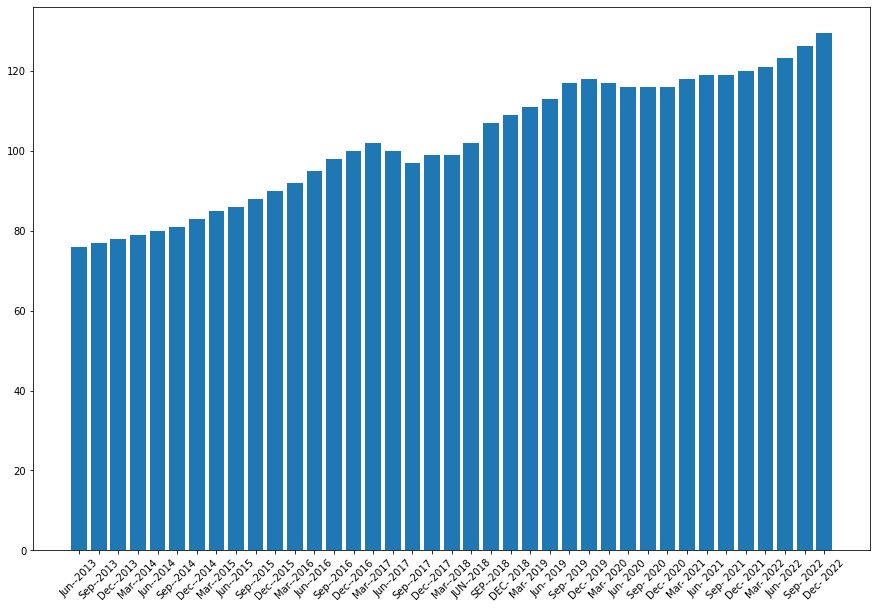

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.bar(x_orig, y);

## Making Predictions

In [15]:
months

{'jan': 1, 'mar': 2, 'jun': 3, 'sep': 4, 'dec': 5}

In [16]:
def gen_preds(num):
  new_year = 2023
  new_month = 0

  preds_y = []
  preds_x = []

  for i in range(num):
    new_month += 1
    pred = int(str(new_month) + str(new_year))
    preds_y.append(reg.predict([[pred]])[0])
    preds_x.append(pred)

    if new_month >= 5: 
      new_month = 0
      new_year += 1
    
  return preds_x, preds_y

In [17]:
new_x, new_y = gen_preds(9)
new_x, new_y

([12023, 22023, 32023, 42023, 52023, 12024, 22024, 32024, 42024],
 [100.75478912694899,
  101.44088835412141,
  102.12698758129383,
  102.81308680846625,
  103.49918603563867,
  100.75485773687171,
  101.44095696404413,
  102.12705619121655,
  102.81315541838897])

In [18]:
new_x = srt_opp(new_x)

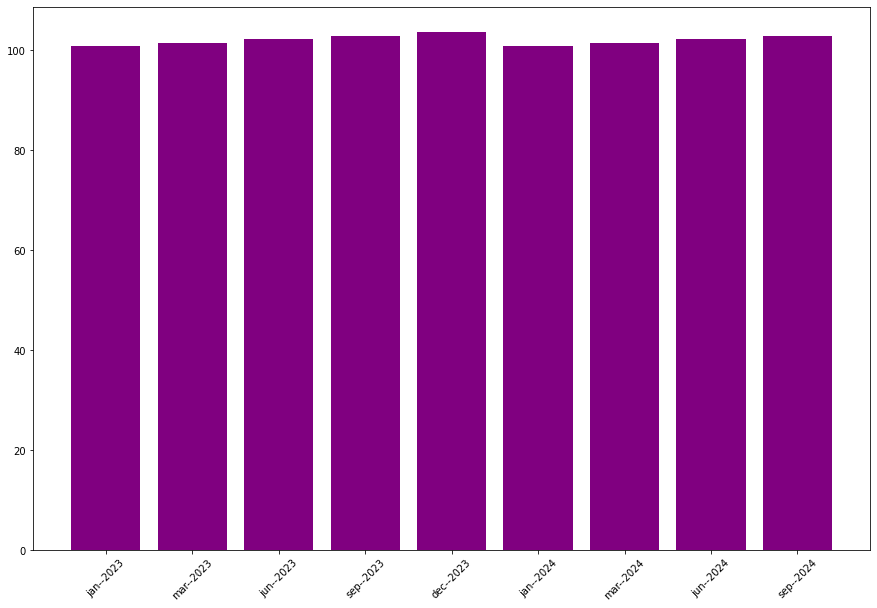

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.bar(new_x, new_y, color='purple');

In [20]:
def pred_plots(num):
  new_x, new_y = gen_preds(num)
  new_x = srt_opp(new_x)

  plt.figure(figsize=(15, 10))
  plt.xticks(rotation=45)
  plt.bar(new_x, new_y);

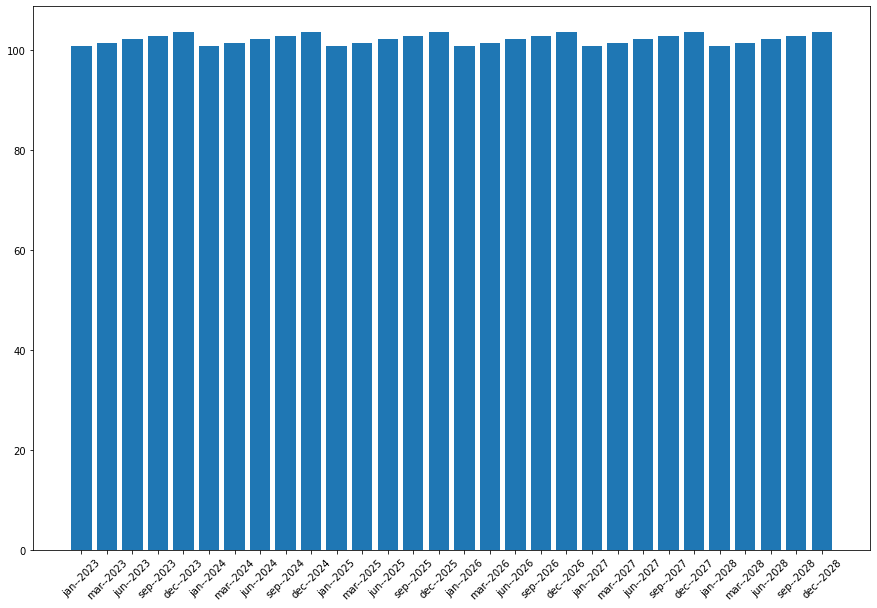

In [21]:
pred_plots(30)

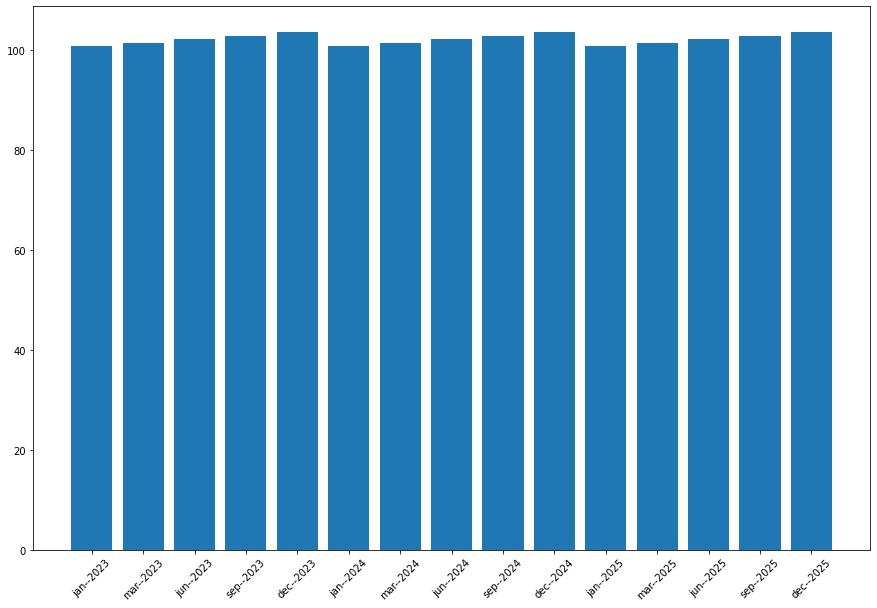

In [22]:
pred_plots(15)

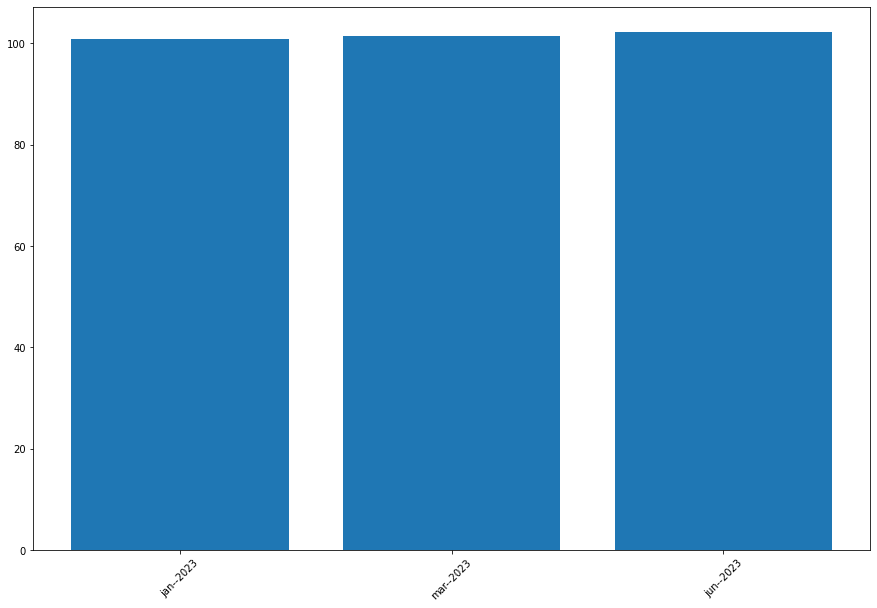

In [23]:
ax = pred_plots(3)

# Web Interface

In [24]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 K

In [25]:
# UPDATE THE PARAMETERS
new_x, new_y = gen_preds(3)
new_x = srt_opp(new_x)

In [26]:
import gradio as gr
import pandas as pd

from vega_datasets import data

barley = data.barley()
simple = pd.DataFrame({
    'a': new_x,
    'b': new_y
})

def bar_plot_fn(display):
    if display == "simple":
        return gr.BarPlot.update(
            simple,
            x="a",
            y="b",
            title="Simple Bar Plot with made up data",
            tooltip=['a', 'b'],
            y_lim=[20, 100]
        )
    elif display == "simple-horizontal":
        return gr.BarPlot.update(
            simple,
            x="a",
            y="b",
            x_title="Variable A",
            y_title="Variable B",
            title="Simple Bar Plot with made up data",
            tooltip=['a', 'b'],
            vertical=False,
            y_lim=[20, 100]
        )


with gr.Blocks() as bar_plot:
    with gr.Row():
        with gr.Column():
            display = gr.Dropdown(
                choices=["simple", "simple-horizontal"],
                value="simple",
                label="Type of Bar Plot"
            )
        with gr.Column():
            plot = gr.BarPlot(show_label=False).style(container=True)
    display.change(bar_plot_fn, inputs=display, outputs=plot)
    bar_plot.load(fn=bar_plot_fn, inputs=display, outputs=plot)


In [27]:
import gradio as gr

with gr.Blocks() as demo:
    bar_plot.render()

if __name__ == "__main__":
    demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://46d4d192005b6201dc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
